In [4]:
import sqlite3

conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

sales_data = [
    ("Shirt", 10, 20.0),
    ("Jeans", 5, 40.0),
    ("Shirt", 7, 20.0),
    ("Shoes", 3, 60.0),
    ("Jeans", 2, 40.0),
    ("Hat", 4, 15.0),
    ("Socks", 10, 5.0),
    ("Shoes", 2, 60.0),
    ("Jacket", 1, 100.0),
    ("Socks", 8, 5.0),
    ("Hat", 6, 15.0),
    ("Shirt", 5, 20.0),
    ("Jacket", 2, 95.0),
    ("Shoes", 1, 65.0),
    ("T-Shirt", 9, 18.0),
    ("T-Shirt", 3, 18.0)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sales_data)

conn.commit()
conn.close()


In [5]:
import pandas as pd

conn = sqlite3.connect('sales_data.db')

query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
conn.close()
print(df)
df


   product  total_qty  revenue
0      Hat         20    300.0
1   Jacket          6    580.0
2    Jeans         28   1120.0
3    Shirt         78   1560.0
4    Shoes         18   1090.0
5    Socks         36    180.0
6  T-Shirt         24    432.0


,product,total_qty,revenue
0,Hat,20,300.0
1,Jacket,6,580.0
2,Jeans,28,1120.0
3,Shirt,78,1560.0
4,Shoes,18,1090.0
5,Socks,36,180.0
6,T-Shirt,24,432.0


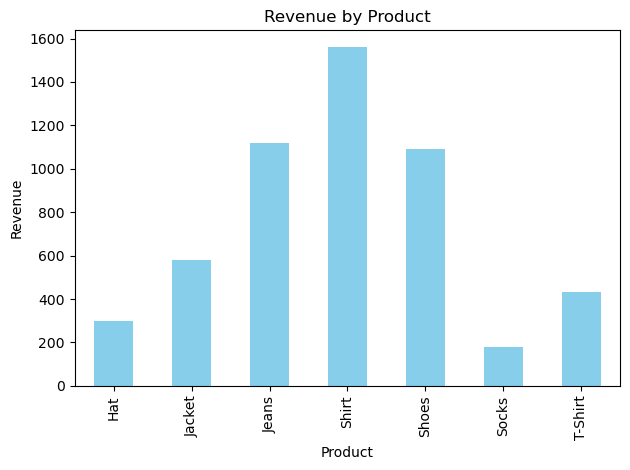

In [6]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')

plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")  
plt.show()
